In [371]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [399]:
df = pd.read_csv("Datasets/scorePridiction.csv")

# EDA


In [400]:
# Remove whitespace from column names
df.columns = df.columns.str.strip()

# Strip whitespace from string values in object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [401]:
df.shape

(260920, 17)

In [402]:
df.duplicated().sum()

0

In [403]:
df.head(20)

,mid,inning,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non_striker,total,final_total
0,1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.0,1.0,0.0,1,0,1,222
1,1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,0,0.1,1.0,0.0,1,1,1,222
2,1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,2.0,0.0,2,1,2,222
3,1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,0,0.3,2.0,0.0,2,2,2,222
4,1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,0,0.4,2.0,0.0,2,2,2,222
5,1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,0,0.5,2.0,0.0,2,2,2,222
6,1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.6,3.0,0.0,3,2,3,222
7,1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,0,0,1.0,3.0,0.0,3,3,3,222
8,1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,4,0,1.1,7.0,0.0,7,3,7,222
9,1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,4,0,1.2,11.0,0.0,11,7,11,222


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             260920 non-null  int64  
 1   inning          260920 non-null  int64  
 2   date            260920 non-null  object 
 3   venue           260920 non-null  object 
 4   bat_team        260920 non-null  object 
 5   bowl_team       260920 non-null  object 
 6   batsman         260920 non-null  object 
 7   bowler          260920 non-null  object 
 8   runs            260920 non-null  int64  
 9   wickets         260920 non-null  int64  
 10  overs           260920 non-null  float64
 11  runs_last_5     260920 non-null  float64
 12  wickets_last_5  260920 non-null  float64
 13  striker         260920 non-null  int64  
 14  non_striker     260920 non-null  int64  
 15  total           260920 non-null  int64  
 16  final_total     260920 non-null  int64  
dtypes: float64

# Observations

- There are no null values in the data set.
- Total of 260920 rows of records in the data.
- Average Score is 157.21.


In [405]:
df.describe()

,mid,inning,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non_striker,total,final_total
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,5.710855e+05,1.483531,1.332807,2.457098,9.460126,34.022888,1.153514,76.214200,76.213763,76.214200,160.579304
std,3.679913e+05,0.502643,1.626416,2.097949,5.686156,15.135758,1.081238,49.336267,49.336437,49.336267,31.409947
min,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.123530e+05,1.000000,0.000000,1.000000,4.400000,25.000000,0.000000,35.000000,35.000000,35.000000,140.000000
50%,6.449860e+05,1.000000,1.000000,2.000000,9.300000,35.000000,1.000000,72.000000,72.000000,72.000000,161.000000
75%,9.180850e+05,2.000000,1.000000,4.000000,14.300000,44.000000,2.000000,112.000000,112.000000,112.000000,181.000000
max,1.090331e+06,6.000000,7.000000,10.000000,19.900000,113.000000,8.000000,287.000000,287.000000,287.000000,287.000000


In [406]:
df.columns

Index(['mid', 'inning', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non_striker', 'total', 'final_total'],
      dtype='object')

In [407]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [408]:
df.bowl_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

##### Observations

- There Are Some Teams `['Pune Warriors', 'Kochi Tuskers Kerala','Rising Pune Supergiants', 'Gujarat Lions', 'Rising Pune Supergiant']` That Doesn't Play Now. So We Can Remove Them.
- Teams Like `['Deccan Chargers','Delhi Daredevils']` changed their name to `['Sunrisers Hyderabad',
'Delhi Capitals']` So We Can Combine Records of Both By Replacing Deccan Chargers with Sunrisers Hyderabaed.


In [409]:
temp = df.copy()

In [410]:
# Current Playing Teams (Till 2024 IPL Season)
teams = [
    'Chennai Super Kings',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Delhi Capitals',
    'Rajasthan Royals',
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bengaluru',
    'Lucknow Super Giants',
    'Gujarat Titans',
]

In [411]:
# Replace old team names with new ones
temp['bowl_team'] = temp['bowl_team'].replace({
    'Punjab Kings': 'Kings XI Punjab',
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'
})

# Same for 'bat_team'
temp['bat_team'] = temp['bat_team'].replace({
    'Punjab Kings': 'Kings XI Punjab',
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'
})

In [412]:
# Filter out teams that no longer play
temp = temp[(temp['bat_team'].isin(teams)) & (temp['bowl_team'].isin(teams))]

In [413]:
temp.bat_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bengaluru',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [414]:
temp.bowl_team.unique()

array(['Royal Challengers Bengaluru', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Capitals',
       'Rajasthan Royals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [415]:
df = temp

In [416]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bengaluru',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

# Removing First 5 Overs Data in Every Match


In [417]:
temp = df.copy()

In [418]:
df = df[df['overs'] >= 5.0]

In [419]:
temp.shape, df.shape

((233901, 17), (172643, 17))

In [420]:
df.columns

Index(['mid', 'inning', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non_striker', 'total', 'final_total'],
      dtype='object')

In [421]:
df.head(3)

,mid,inning,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non_striker,total,final_total
32,1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bengaluru,BB McCullum,Z Khan,1,0,5.0,59.0,0.0,61,60,61,222
33,1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bengaluru,SC Ganguly,Z Khan,0,1,5.1,59.0,1.0,61,61,61,222
34,1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bengaluru,RT Ponting,Z Khan,0,1,5.2,59.0,1.0,61,61,61,222


In [422]:
# Checking Unique Values In Every Columns
for col in df.columns:
    print(f"Column {col} has {df[col].nunique()} unique values")

Column mid has 979 unique values
Column inning has 2 unique values
Column date has 769 unique values
Column venue has 55 unique values
Column bat_team has 10 unique values
Column bowl_team has 10 unique values
Column batsman has 636 unique values
Column bowler has 504 unique values
Column runs has 8 unique values
Column wickets has 11 unique values
Column overs has 148 unique values
Column runs_last_5 has 98 unique values
Column wickets_last_5 has 9 unique values
Column striker has 263 unique values
Column non_striker has 262 unique values
Column total has 263 unique values
Column final_total has 179 unique values


# Dropping Unnecessary Columns

1. Batsman : Players Gets Removed and Added In Every Match. Having Data Only For 636 Players Is Not Enough.
2. Bowler: Less Data Contains Only 504 Bowlers.
3. mid: ID of match (Not Required For Prediction)
4. striker : Batsman on strike (Same Reason as Col batsman and bowler)
5. non-striker: Same Reason as Col batsman and bowler.
   <br><br>
   ➡️ Date : It is also not required but we will use it to split the data based on season.


In [423]:
# columns = ['mid', 'batsman', 'bowler', 'striker', 'non_striker', 'venue']
columns = ['mid', 'batsman', 'bowler', 'striker', 'non_striker', 'venue', 'inning']
df.drop(columns, inplace=True, axis=1)
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total', 'final_total'],
      dtype='object')

In [424]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,final_total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,1,0,5.0,59.0,0.0,61,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,5.1,59.0,1.0,61,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,5.2,59.0,1.0,61,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,5.3,59.0,1.0,61,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,5.4,58.0,1.0,61,222


##### Date


In [425]:
df.date.dtype

dtype('O')

In [426]:
df.date.head()

32    2008-04-18
33    2008-04-18
34    2008-04-18
35    2008-04-18
36    2008-04-18
Name: date, dtype: object

In [427]:
df['season'] = df['date'].apply(lambda x: x.split('-')[0]).astype(int)

In [428]:
df['season']

32        2008
33        2008
34        2008
35        2008
36        2008
          ... 
260915    2024
260916    2024
260917    2024
260918    2024
260919    2024
Name: season, Length: 172643, dtype: int32

C:\Users\ARTH ARVIND\AppData\Local\Temp\ipykernel_26804\826992997.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_per_season = df.groupby('season').apply(


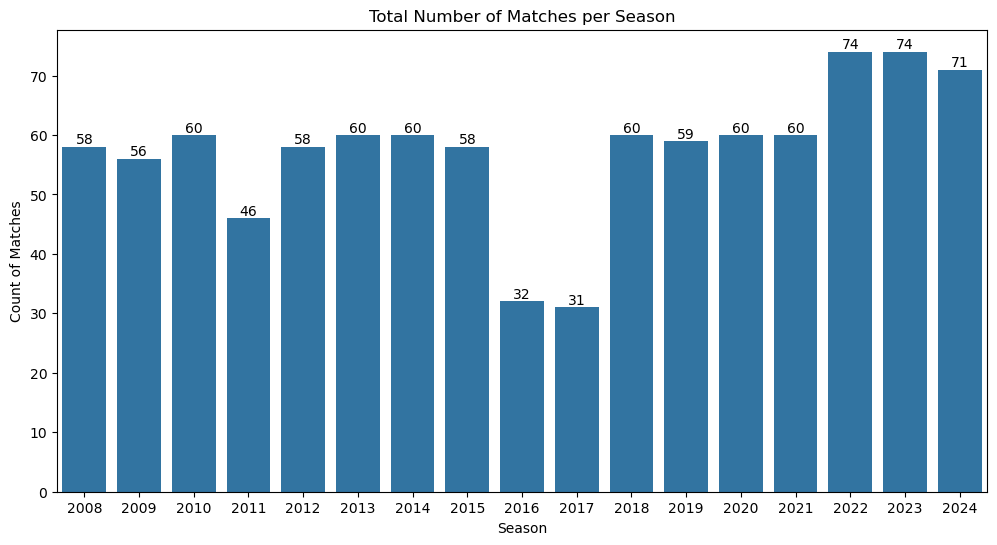

In [429]:
matches_per_season = df.groupby('season').apply(
    lambda x:  round(x[['date', 'bat_team', 'bowl_team']
                       ].drop_duplicates().shape[0]/2)
).reset_index(name='match_count')


matches_per_season = matches_per_season[['season', 'match_count']]


plt.figure(figsize=(12, 6))
ax = sns.barplot(x='season', y='match_count', data=matches_per_season)
ax.bar_label(ax.containers[0])
plt.title('Total Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Count of Matches')
plt.show()

In [430]:
df.drop('date', inplace=True, axis=1)

In [432]:
# Average Score By Each Team
pd.DataFrame(df.groupby(['bat_team'])['final_total'].mean())

,final_total
bat_team,
Chennai Super Kings,165.076586
Delhi Capitals,157.872480
Gujarat Titans,173.519814
Kings XI Punjab,163.409501
Kolkata Knight Riders,160.344182
Lucknow Super Giants,172.816240
Mumbai Indians,164.006885
Rajasthan Royals,160.641415
Royal Challengers Bengaluru,162.169635


In [433]:
# One Hot Encoding
df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

Correlation


In [434]:
df.season

32        2008
33        2008
34        2008
35        2008
36        2008
          ... 
260915    2024
260916    2024
260917    2024
260918    2024
260919    2024
Name: season, Length: 172643, dtype: int32

In [435]:
# ## Splliting Data
# X_train = df[df['season']<=2015]
# X_train = X_train.drop(['total','season'],axis=1)

# y_train = df[df['season']<=2015]
# y_train = y_train['total']

# X_test = df[df['season']>2015]
# X_test = X_test.drop(['total','season'],axis=1)

# y_test = df[df['season']>2015]
# y_test = y_test['total']
df[['total', 'wickets']]

,total,wickets
32,61,0
33,61,1
34,61,1
35,61,1
36,61,1
...,...,...
260915,110,2
260916,111,2
260917,112,2
260918,113,2


In [477]:
# Shuffling Dataset
from sklearn.model_selection import train_test_split, RandomizedSearchCV
df = df.sample(df.shape[0])

# Splitting Using Train Test Split
X = df.drop(['runs', 'season', 'final_total'], axis=1)
y = df['final_total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# from sklearn.model_selection import KFold
# kf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=None)

# for train_index, test_index in kf.split(X):
#       print("Train:", train_index, "Validation:",test_index)
#       X_train, X_test = X[train_index], X[test_index]
#       y_train, y_test = y[train_index], y[test_index]

df.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,final_total,season,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Gujarat Titans,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Lucknow Super Giants,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bengaluru,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Gujarat Titans,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Lucknow Super Giants,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bengaluru,bowl_team_Sunrisers Hyderabad
207864,6,1,12.1,54.0,1.0,112,192,2021,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
215682,1,4,9.5,33.0,2.0,77,115,2022,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
231739,1,2,8.3,59.0,0.0,103,218,2023,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
214803,1,2,9.0,42.0,1.0,65,152,2022,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
165824,1,6,19.3,34.0,4.0,146,147,2019,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [457]:
X_train.shape
X_train.columns

Index(['wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Capitals',
       'bat_team_Gujarat Titans', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Lucknow Super Giants',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bengaluru', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Capitals',
       'bowl_team_Gujarat Titans', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Lucknow Super Giants',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bengaluru',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [458]:
y_train.head()

205204    171
172713    137
6748      124
26118     166
110143    184
Name: final_total, dtype: int64

In [459]:
X_test.shape

(51793, 25)

In [460]:
y_test.head()

31428     135
104627    142
5407      133
124169    142
18237     148
Name: final_total, dtype: int64

In [461]:
X_train.head()

,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Gujarat Titans,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Lucknow Super Giants,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bengaluru,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Gujarat Titans,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Lucknow Super Giants,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bengaluru,bowl_team_Sunrisers Hyderabad
205204,2,14.3,54.0,2.0,123,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
172713,3,12.1,32.0,1.0,105,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
6748,2,5.3,30.0,2.0,34,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
26118,4,16.2,39.0,2.0,153,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
110143,1,10.2,40.0,0.0,90,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


<Axes: >

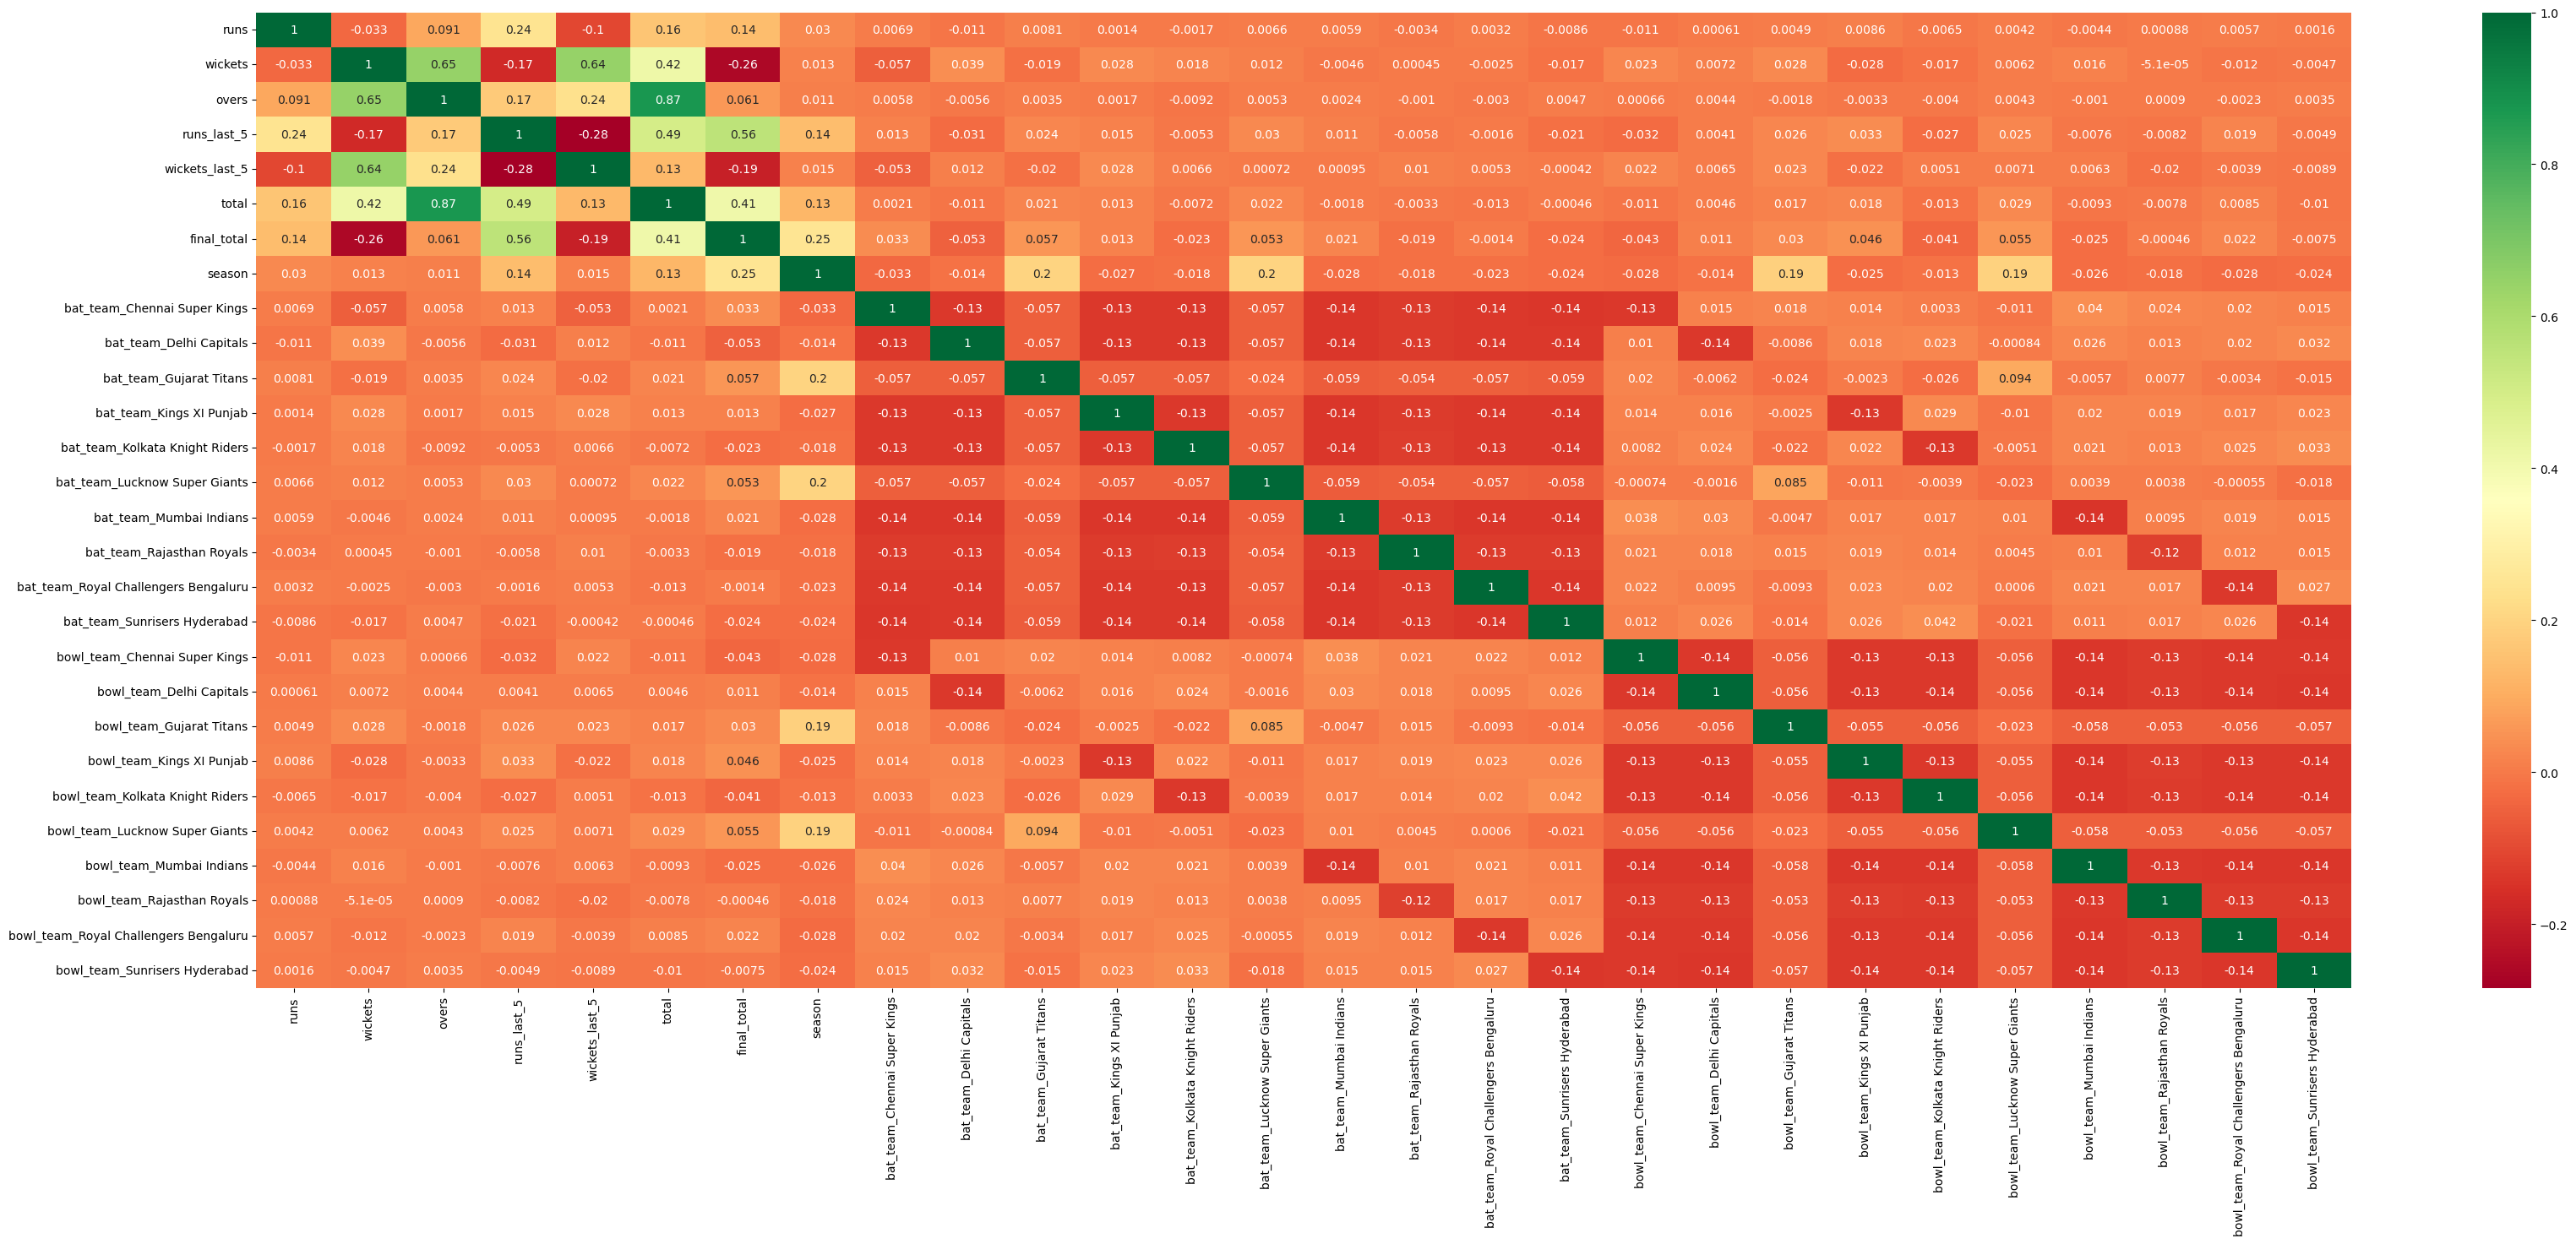

In [462]:
corrmat = df.corr()
plt.figure(figsize=(40, 15))
# plot heat map
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

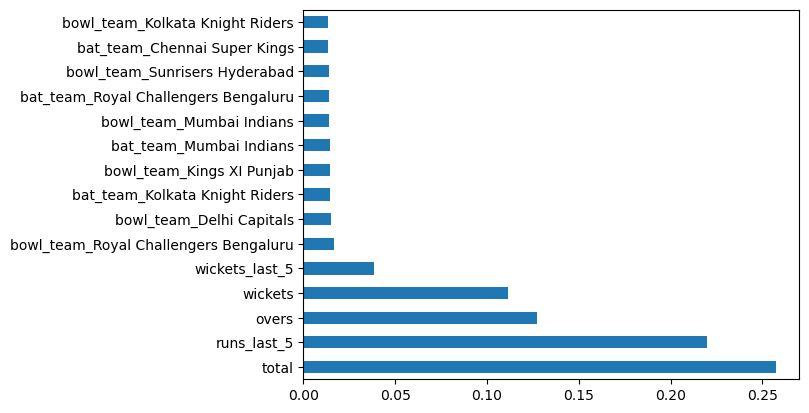

In [463]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train, y_train)

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## MODEL TRAINING


Training Model With Base Parameters


In [464]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [465]:
r2_scores = {}
mae = {}

Predictions:
 [143.29815235 157.9972961  142.21580869 ... 166.11570137 185.70657194
 163.03765468]


r2 score on Training Data 0.5547491273231338
r2 score Test Data is: 0.5565996366315338


MAE:15.15994649484602
MSE:418.7875982736371
RMSE:20.464300581100666


C:\Users\ARTH ARVIND\AppData\Local\Temp\ipykernel_26804\1457318900.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='final_total', ylabel='Density'>

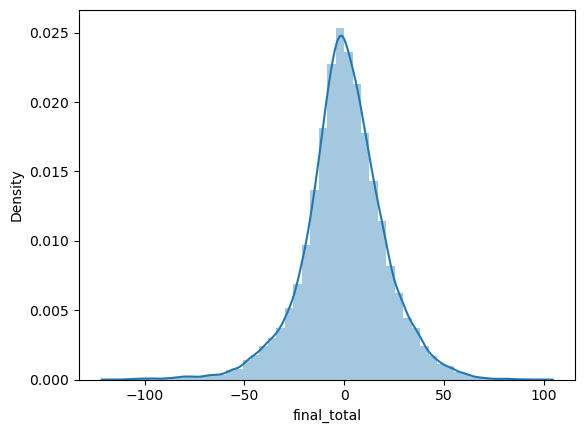

In [466]:
######### LINEAR REGRESSION ###########
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, lr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['Linear Regression'] = r2_score(y_test, predictions)
mae['Linear Regression'] = mean_absolute_error(y_test, predictions)

sns.distplot(y_test-predictions)

Predictions:
 [162.94798734 161.68710233 153.8789213  ... 143.64454935 161.68710233
 153.8789213 ]


r2 score on Training Data 0.2141072065189792
r2 score Test Data is: 0.21348886996589111


MAE:21.18302899205909
MSE:742.8525873551272
RMSE:27.255322184027236


C:\Users\ARTH ARVIND\AppData\Local\Temp\ipykernel_26804\1298546596.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='final_total', ylabel='Density'>

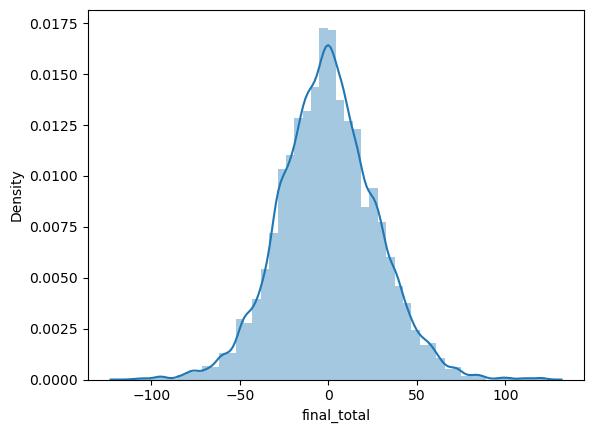

In [467]:
########## DECISION TREES ########
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5, max_features=3, random_state=42)
dtr.fit(X_train, y_train)

predictions = dtr.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, dtr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['DecisionTreeRegressor'] = r2_score(y_test, predictions)
mae['DecisionTreeRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

In [478]:
########## RANDOM FOREST  ########
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
param_distributions = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 30, None], # None means nodes are expanded until all leaves are pure
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 1.0] # '1.0' in sklearn > 1.1 is equivalent to 'auto'
}

random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_distributions,
                                   n_iter=10,
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_
print(f"\nBest Hyperparameters Found:\n{random_search.best_params_}")
predictions = best_rf.predict(X_test)
rf.fit(X_train, y_train)

# predictions = rf.predict(X_test)
# print("Predictions:\n", predictions)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, rf.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['RandomForestRegressor'] = r2_score(y_test, predictions)
mae['RandomForestRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Hyperparameters Found:
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 1.0, 'max_depth': None}
Predictions:
 [162.97920635 163.66376331 146.22095296 ... 198.26149048 175.26300238
 154.83651508]




NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.



r2 score on Training Data 0.9425904649949131
r2 score Test Data is: 0.7993513266588749


MAE:9.300273970583604
MSE:187.76176556793163
RMSE:13.702618930990223


C:\Users\ARTH ARVIND\AppData\Local\Temp\ipykernel_26804\1323831861.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='final_total', ylabel='Density'>

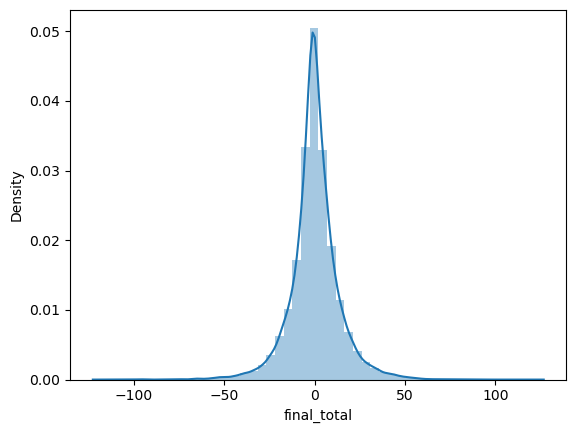

In [480]:
print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, best_rf.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['Best_RandomForestRegressor'] = r2_score(y_test, predictions)
mae['Best_RandomForestRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

Predictions:
 [144.04018406 162.28048985 151.97578739 ... 167.50967064 180.89285641
 151.12938497]


r2 score on Training Data 0.717150495956175
r2 score Test Data is: 0.6836265720863104


MAE:12.646708908568648
MSE:298.81181654212963
RMSE:17.286174144157222


C:\Users\ARTH ARVIND\AppData\Local\Temp\ipykernel_26804\2778413602.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='final_total', ylabel='Density'>

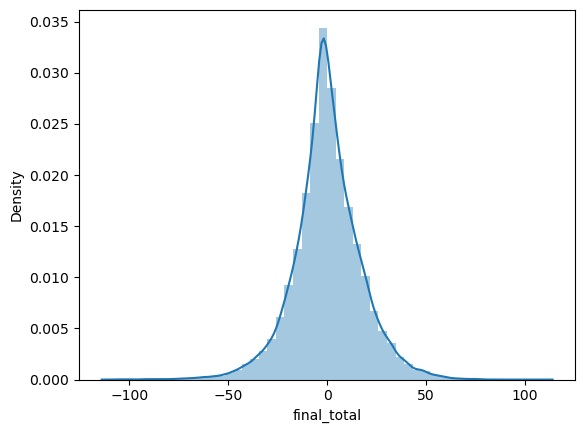

In [469]:
######### EXTRA TREE REGRESSOR ########
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(max_depth=15, n_estimators=100,
                          max_features=1.0, min_samples_split=5)
etr.fit(X_train, y_train)

predictions = etr.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, etr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')

print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['ExtraTreesRegressor'] = r2_score(y_test, predictions)
mae['ExtraTreesRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

Predictions:
 [149.45476563 165.38718909 150.18889597 ... 153.75974267 179.57767296
 151.14240385]


r2 score on Training Data 0.5593043496694149
r2 score Test Data is: 0.5586302723565908


MAE:15.204872083819481
MSE:416.8696813558321
RMSE:20.417386741594335


C:\Users\ARTH ARVIND\AppData\Local\Temp\ipykernel_26804\3848263487.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='final_total', ylabel='Density'>

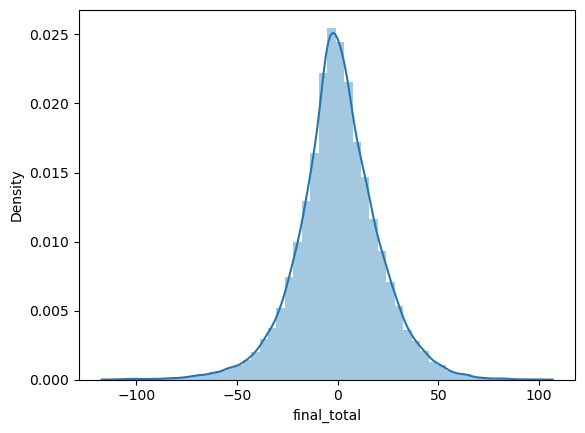

In [470]:
################### GradientBoostingRegressor ###############
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

predictions = gbr.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, gbr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))


r2_scores['GradientBoostingRegressor'] = r2_score(y_test, predictions)
mae['GradientBoostingRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

Predictions:
 [146.35956 159.99492 143.14117 ... 177.17397 191.08466 150.4682 ]


r2 score on Training Data 0.6923134402688432
r2 score Test Data is: 0.665453375886495


MAE:13.155617731070903
MSE:315.97623456754235
RMSE:17.775720367049612


C:\Users\ARTH ARVIND\AppData\Local\Temp\ipykernel_26804\1199282969.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='final_total', ylabel='Density'>

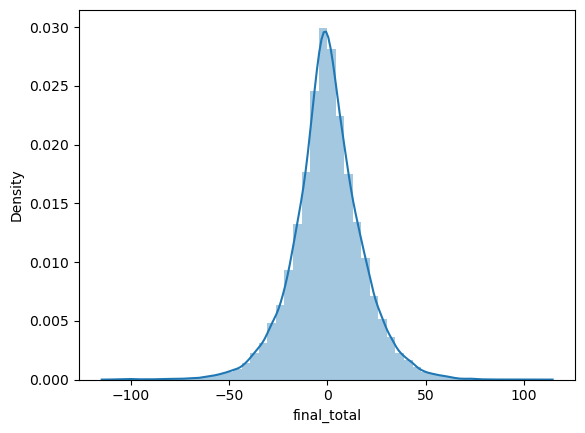

In [471]:
################### XGBRegressor ###############
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

predictions = xgb.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, xgb.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['XGBRegressor'] = r2_score(y_test, predictions)
mae['XGBRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

[Text(0, 0, '0.799351'),
 Text(0, 0, '0.685456'),
 Text(0, 0, '0.683627'),
 Text(0, 0, '0.665453'),
 Text(0, 0, '0.55863'),
 Text(0, 0, '0.5566'),
 Text(0, 0, '0.213489')]

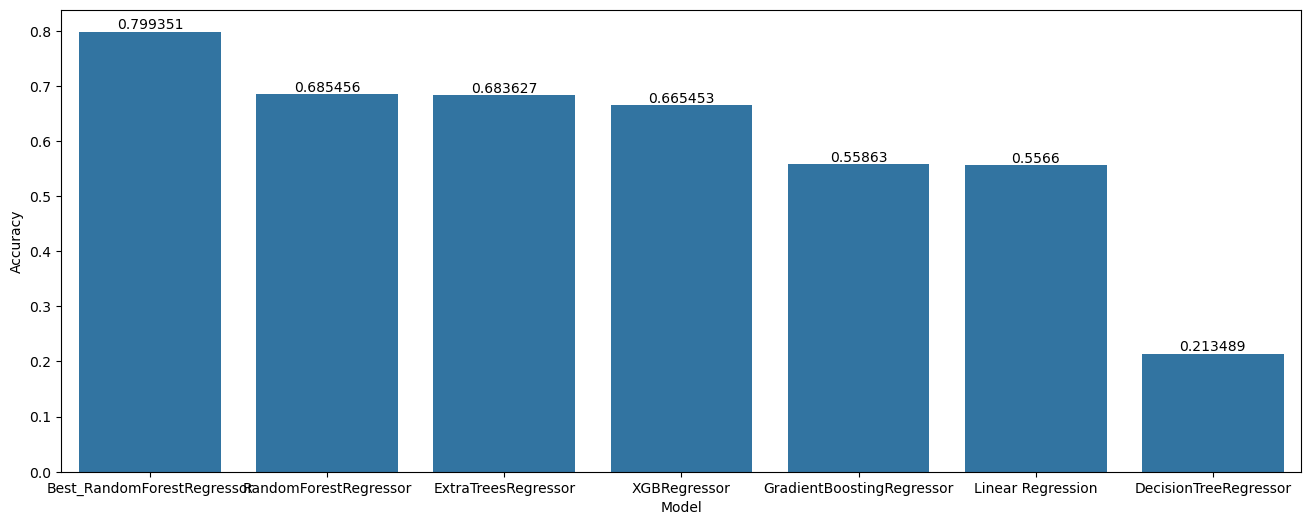

In [481]:
# Comparing Different R2 Scores
plt.figure(figsize=(16, 6))
scores = pd.DataFrame(r2_scores.items(), columns=['Model', 'Accuracy'])
ax = sns.barplot(data=scores.sort_values(
    "Accuracy", ascending=False), x='Model', y='Accuracy')
ax.bar_label(ax.containers[0])

[Text(0, 0, '9.30027'),
 Text(0, 0, '12.3771'),
 Text(0, 0, '12.6467'),
 Text(0, 0, '13.1556'),
 Text(0, 0, '15.1599'),
 Text(0, 0, '15.2049'),
 Text(0, 0, '21.183')]

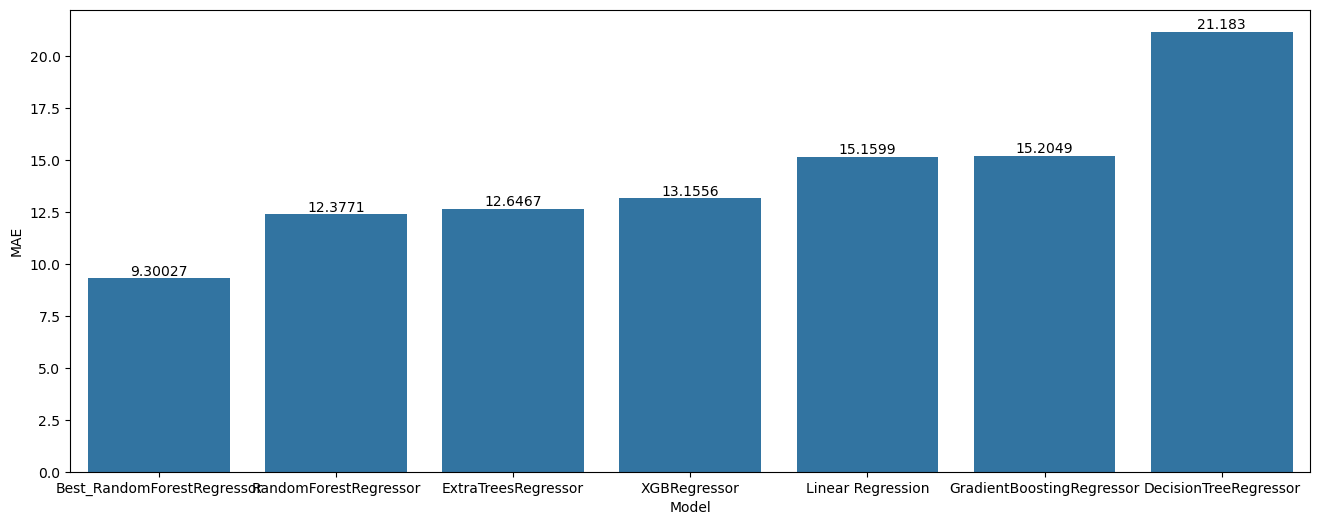

In [482]:
# Comparing Different MAE
plt.figure(figsize=(16, 6))
scores = pd.DataFrame(mae.items(), columns=['Model', 'MAE'])
ax = sns.barplot(data=scores.sort_values(
    "MAE", ascending=True), x='Model', y='MAE')
ax.bar_label(ax.containers[0])

So Linear Regression Gives Least MAE with Highest Accuracy.


In [474]:
pd.set_option('display.max_columns', 2000)
X_test.head()

,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Gujarat Titans,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Lucknow Super Giants,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bengaluru,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Gujarat Titans,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Lucknow Super Giants,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bengaluru,bowl_team_Sunrisers Hyderabad
31428,5,15.2,39.0,2.0,103,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
104627,3,10.4,43.0,1.0,84,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
5407,3,6.6,38.0,2.0,42,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
124169,4,12.4,30.0,1.0,73,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
18237,6,19.1,48.0,2.0,134,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False


In [489]:
import pickle
file_name = 'C:/Users/ARTH ARVIND/Desktop/sem 3 trash/ipl-analytics-main/Model/predict_ipl_1st_innings_score_best_rf.pkl'
pickle.dump(best_rf, open(file_name, 'wb'))

In [490]:
loaded_model = pickle.load(open(file_name, "rb"))
pred = loaded_model.predict(X_test)
print(r2_score(y_test, pred))
print('MAE:{}'.format(mean_absolute_error(y_test, pred)))
print('MSE:{}'.format(mean_squared_error(y_test, pred)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, pred))))

0.7993513266588749
MAE:9.300273970583604
MSE:187.76176556793163
RMSE:13.702618930990223


In [483]:
# Actual 147
data = [4, 15, 33, 3, 139, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
score = best_rf.predict([data])
print(score)
print(f'Final Score Will Be Between {int(score[0]-5)} and {int(score[0]+5)}')

[187.50730129]
Final Score Will Be Between 182 and 192


C:\Users\ARTH ARVIND\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [488]:
# Actual 202
data = [2, 18, 70, 1, 180, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
score = best_rf.predict([data])
print(score)
print(f'Final Score Will Be Between {int(score[0]-5)} and {int(score[0]+5)}')

[206.94510743]
Final Score Will Be Between 201 and 211


C:\Users\ARTH ARVIND\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
